# Importing Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Transforming and visualization

In [3]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) #setting mean and std to 0.5
])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root = './data',
                                       train = True,
                                       download = True,
                                       transform = transform_train)

testset = torchvision.datasets.CIFAR10(root = './data',
                                       train = False,
                                       download = True,
                                       transform = transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
num_classes=10

In [6]:
classes =  ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [7]:
batch_size=4

In [8]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [9]:
dataiter = iter(trainloader) 
images, labels = dataiter.next() 
 
print(images.shape)
print(images[0].shape)         
print(labels[0].item()) 

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
4


In [10]:
def imshow(img,title):
    npimg = img.numpy()*0.5 + 0.5 #un normalization ie  " * std + mean "
    plt.figure(figsize = (batch_size,1))
    plt.axis("off")
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

In [11]:
def show_batch_images(dataloader):
    images , labels= next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img , title = ' '.join(classes[labels[j]]for j in range(4)))

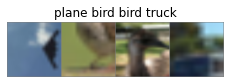

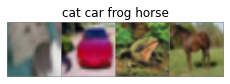

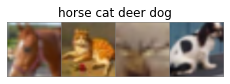

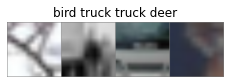

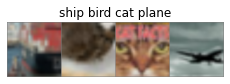

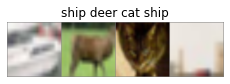

In [12]:
for i in range(6): #we can change range
    show_batch_images(trainloader)

In [2]:
from torchvision import models

In [14]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# VGG16 Model

In [15]:
vgg = models.vgg16_bn(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [16]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)]) 
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


Now we have changed the out_features to 10 as we have 10 classes

In [17]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [18]:
for param in vgg.parameters():    
    param.requires_grad = False

In [19]:
final_in_features = vgg.classifier[6].in_features  
vgg.classifier[6] = nn.Linear(final_in_features, num_classes) 

In [20]:
for param in vgg.parameters():
    if param.requires_grad:       
        print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [21]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [26]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [23]:
import copy

In [25]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 2.45
Iteration: 0/3125, Loss: 2.45
Min loss 2.44
Min loss 2.27
Min loss 2.25
Min loss 2.12
Min loss 1.81
Min loss 1.59
Min loss 1.50
Min loss 1.45
Min loss 1.44
Min loss 1.28
Min loss 1.28
Min loss 0.90
Iteration: 100/3125, Loss: 2.00
Iteration: 200/3125, Loss: 2.77
Iteration: 300/3125, Loss: 2.84
Min loss 0.83
Iteration: 400/3125, Loss: 1.71
Min loss 0.52
Iteration: 500/3125, Loss: 1.95
Iteration: 600/3125, Loss: 1.74
Iteration: 700/3125, Loss: 2.27
Iteration: 800/3125, Loss: 0.70
Iteration: 900/3125, Loss: 1.61
Iteration: 1000/3125, Loss: 1.90
Iteration: 1100/3125, Loss: 2.07
Iteration: 1200/3125, Loss: 1.57
Iteration: 1300/3125, Loss: 1.92
Iteration: 1400/3125, Loss: 3.27
Iteration: 1500/3125, Loss: 1.28
Iteration: 1600/3125, Loss: 1.34
Min loss 0.52
Iteration: 1700/3125, Loss: 3.41
Iteration: 1800/3125, Loss: 2.31
Min loss 0.51
Iteration: 1900/3125, Loss: 2.20
Iteration: 2000/3125, Loss: 2.88
Iteration: 2100/3125, Loss: 1.56
Iteration: 2200/3125, Loss: 1.64
Iteration: 2300

In [26]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

45.096 45.46


# ResNet Model

In [3]:
resnet = models.resnet18(pretrained=True)

In [28]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
for param in resnet.parameters():
    param.requires_grad = False

In [30]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [31]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [32]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)

In [34]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 1.31
Iteration: 0/3125, Loss: 1.31
Min loss 1.23
Min loss 1.16
Min loss 0.94
Min loss 0.93
Min loss 0.87
Min loss 0.87
Min loss 0.68
Iteration: 100/3125, Loss: 1.49
Iteration: 200/3125, Loss: 1.77
Iteration: 300/3125, Loss: 1.00
Min loss 0.64
Iteration: 400/3125, Loss: 0.85
Min loss 0.60
Min loss 0.46
Iteration: 500/3125, Loss: 1.34
Iteration: 600/3125, Loss: 1.56
Iteration: 700/3125, Loss: 0.89
Iteration: 800/3125, Loss: 1.66
Iteration: 900/3125, Loss: 1.48
Iteration: 1000/3125, Loss: 2.19
Iteration: 1100/3125, Loss: 1.35
Iteration: 1200/3125, Loss: 1.30
Iteration: 1300/3125, Loss: 1.37
Iteration: 1400/3125, Loss: 1.29
Iteration: 1500/3125, Loss: 1.09
Iteration: 1600/3125, Loss: 0.91
Iteration: 1700/3125, Loss: 1.49
Iteration: 1800/3125, Loss: 1.29
Iteration: 1900/3125, Loss: 0.89
Iteration: 2000/3125, Loss: 1.11
Iteration: 2100/3125, Loss: 1.57
Iteration: 2200/3125, Loss: 0.85
Iteration: 2300/3125, Loss: 2.16
Iteration: 2400/3125, Loss: 0.94
Iteration: 2500/3125, Loss: 1.80


In [35]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))

57.182 56.51


# GoogleNet Model

In [15]:
googlenet = models.googlenet(pretrained=True)

In [16]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [17]:
for param in googlenet.parameters():
    param.requires_grad = False

In [18]:
in_features = googlenet.fc.in_features
googlenet.fc = nn.Linear(in_features, num_classes)

In [19]:
for param in googlenet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 1024])
torch.Size([10])


In [20]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [21]:
googlenet = googlenet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(googlenet.parameters(), lr=0.01)

In [24]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = googlenet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(googlenet.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 2.26
Iteration: 0/3125, Loss: 2.26
Min loss 2.26
Min loss 2.24
Min loss 2.18
Min loss 2.14
Min loss 2.13
Min loss 2.12
Min loss 2.10
Min loss 2.04
Min loss 1.99
Min loss 1.97
Min loss 1.90
Iteration: 100/3125, Loss: 2.08
Min loss 1.90
Min loss 1.88
Min loss 1.87
Min loss 1.81
Min loss 1.76
Iteration: 200/3125, Loss: 1.86
Min loss 1.70
Min loss 1.68
Iteration: 300/3125, Loss: 1.92
Min loss 1.65
Min loss 1.54
Min loss 1.44
Min loss 1.39
Iteration: 400/3125, Loss: 1.71
Min loss 1.33
Min loss 1.27
Iteration: 500/3125, Loss: 1.68
Min loss 1.23
Iteration: 600/3125, Loss: 1.51
Min loss 1.09
Iteration: 700/3125, Loss: 1.73
Min loss 1.06
Iteration: 800/3125, Loss: 1.81
Min loss 1.04
Iteration: 900/3125, Loss: 1.21
Min loss 1.01
Iteration: 1000/3125, Loss: 1.63
Iteration: 1100/3125, Loss: 1.51
Min loss 0.93
Iteration: 1200/3125, Loss: 1.30
Iteration: 1300/3125, Loss: 1.44
Iteration: 1400/3125, Loss: 1.62
Iteration: 1500/3125, Loss: 1.48
Iteration: 1600/3125, Loss: 1.64
Min loss 0.87
Ite

In [28]:
googlenet.load_state_dict(best_model)
print(evaluation(trainloader, googlenet), evaluation(testloader, googlenet))

52.544 52.56
